In [1]:
import re
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)

import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='dark')


In [2]:
%ls ../input

sample_submission.csv*  test_transaction.csv*  train_transaction.csv*
test_identity.csv*      train_identity.csv*


In [3]:

def select_columns_regexp(regexp):
  return [col for col in df.columns if re.search(regexp, col)]

def hist(ser, title=None):
  fig, ax = plt.subplots(1, 1, figsize=(16, 6))
  sns.distplot(ser[ser.notnull()], kde=False, ax=ax)
  if title: plt.title(title)
  
def bar(ser, normalize=False, title=None):
  fig, ax = plt.subplots(1, 1, figsize=(16, 6))
  sns.barplot(x=ser.index, y=ser.values / (ser.values.sum() if normalize else 1))
  if title: plt.title(title)


def heatmap(cols):
  corr = df[cols].corr()
  mask = np.zeros_like(corr)
  mask[np.triu_indices_from(mask, k=1)] = True
  
  fig, ax = plt.subplots(1, 1, figsize=(12, 8))
  hm = sns.heatmap(corr, 
                   cmap="RdYlBu_r",
                   fmt='.2f',
                   ax=ax,
                   annot=True,
                   mask=mask,
                   linewidths=.05)

In [4]:
df = pd.read_csv('../input/train_identity.csv')
df.sample(10)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
32497,3070670,-5.0,76445.0,NaN,NaN,20.0,-11.0,NaN,NaN,6.0,-12.0,96.470001,NotFound,52.0,-300.0,New,NotFound,166.0,13.0,410.0,549.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Windows 7,ie 11.0 for desktop,24.0,1920x1080,match_status:2,T,F,T,T,desktop,Trident/7.0
21339,3048504,-5.0,80029.0,NaN,NaN,1.0,-100.0,NaN,NaN,NaN,NaN,100.000000,NotFound,52.0,-300.0,New,NotFound,166.0,13.0,410.0,489.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Windows 7,chrome 61.0,24.0,1440x900,match_status:2,T,F,T,T,desktop,Windows
20479,3046358,-5.0,52900.0,0.0,0.0,6.0,-5.0,NaN,NaN,0.0,0.0,100.000000,NotFound,52.0,-360.0,Found,Found,166.0,12.0,410.0,214.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Windows 7,chrome 63.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,Windows
134410,3530641,-5.0,110662.0,NaN,NaN,2.0,-5.0,NaN,NaN,NaN,NaN,100.000000,NotFound,64.0,-360.0,New,NotFound,166.0,15.0,352.0,214.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,2208x1242,match_status:1,T,F,T,F,mobile,iOS Device
106550,3386609,-5.0,3780.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.000000,Found,52.0,-300.0,New,NotFound,166.0,NaN,533.0,533.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Windows 10,firefox 59.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,Windows
133680,3527526,-5.0,882.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.000000,Found,52.0,-300.0,Found,Found,166.0,NaN,633.0,533.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Windows 10,edge 16.0,24.0,1366x767,match_status:2,T,F,T,T,desktop,Windows
98159,3346271,-10.0,129837.0,NaN,NaN,-14.0,-14.0,NaN,NaN,NaN,NaN,100.000000,NotFound,52.0,NaN,New,NotFound,225.0,NaN,427.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 64.0,NaN,NaN,NaN,F,F,T,F,desktop,NaN
123519,3477473,-5.0,299708.0,NaN,NaN,0.0,-1.0,NaN,NaN,NaN,NaN,100.000000,NotFound,52.0,NaN,New,NotFound,225.0,NaN,254.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 65.0,NaN,NaN,NaN,F,F,T,F,desktop,Windows
30411,3066747,0.0,47948.0,NaN,NaN,6.0,-48.0,NaN,NaN,NaN,NaN,100.000000,NotFound,NaN,-420.0,New,NotFound,166.0,15.0,373.0,266.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Mac OS X 10_12_6,chrome 63.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,MacOS
110654,3404481,-10.0,140986.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,100.000000,NotFound,52.0,NaN,New,NotFound,166.0,NaN,371.0,222.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 65.0,NaN,NaN,NaN,F,F,T,F,desktop,NaN


In [5]:
df.columns

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')

In [6]:
print(df.columns)

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')


In [7]:
df.shape[1]

41

In [8]:
df.describe()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,1.442330e+05,144233.000000,140872.000000,66324.000000,66324.000000,136865.000000,136865.000000,5155.000000,5155.000000,74926.000000,74926.000000,140978.000000,127320.000000,80044.000000,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000
mean,3.236329e+06,-10.170502,174716.584708,0.060189,-0.058938,1.615585,-6.698710,13.285354,-38.600388,0.091023,-0.301124,99.745325,48.053071,-344.507146,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
std,1.788496e+05,14.347949,159651.816856,0.598231,0.701015,5.249856,16.491104,11.384207,26.084899,0.983842,2.789446,1.127602,11.774858,93.695502,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502
min,2.987004e+06,-100.000000,1.000000,-13.000000,-28.000000,-72.000000,-100.000000,-46.000000,-100.000000,-36.000000,-100.000000,90.000000,10.000000,-660.000000,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,3.077142e+06,-10.000000,67992.000000,0.000000,0.000000,0.000000,-6.000000,5.000000,-48.000000,0.000000,0.000000,100.000000,49.000000,-360.000000,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.198818e+06,-5.000000,125800.500000,0.000000,0.000000,0.000000,0.000000,14.000000,-34.000000,0.000000,0.000000,100.000000,52.000000,-300.000000,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
75%,3.392923e+06,-5.000000,228749.000000,0.000000,0.000000,1.000000,0.000000,22.000000,-23.000000,0.000000,0.000000,100.000000,52.000000,-300.000000,225.000000,15.000000,427.000000,533.000000,486.500000,14.000000,15.000000,371.000000,169.000000,32.000000
max,3.577534e+06,0.000000,999595.000000,10.000000,0.000000,52.000000,0.000000,61.000000,0.000000,25.000000,0.000000,100.000000,64.000000,720.000000,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
TransactionID    144233 non-null int64
id_01            144233 non-null float64
id_02            140872 non-null float64
id_03            66324 non-null float64
id_04            66324 non-null float64
id_05            136865 non-null float64
id_06            136865 non-null float64
id_07            5155 non-null float64
id_08            5155 non-null float64
id_09            74926 non-null float64
id_10            74926 non-null float64
id_11            140978 non-null float64
id_12            144233 non-null object
id_13            127320 non-null float64
id_14            80044 non-null float64
id_15            140985 non-null object
id_16            129340 non-null object
id_17            139369 non-null float64
id_18            45113 non-null float64
id_19            139318 non-null float64
id_20            139261 non-null float64
id_21            5159 non-null float64
id_2

In [10]:
def classify_browser(browser):
  if not isinstance(browser, str): return np.nan
  
  browser_types = [
    'chrome',
    'safari',
    'firefox',
    'edge',
    'ie',
    'samsung',
  ]
  
  for bt in browser_types:  
    if re.search(bt, browser.lower()):
      return bt
    
  return 'other'

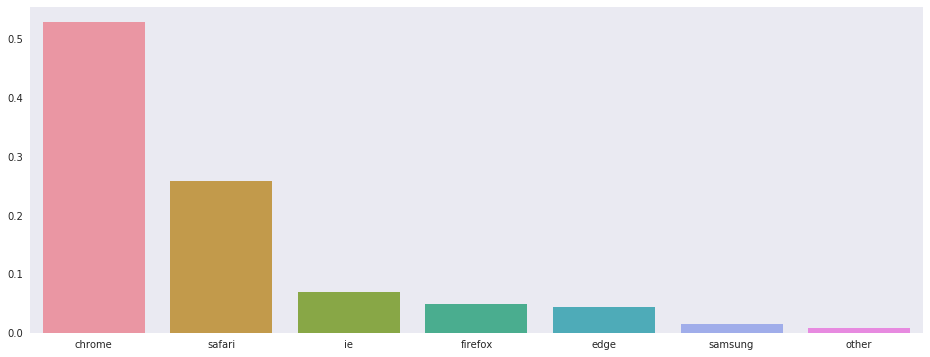

In [11]:
bar(df['id_31'].map(classify_browser).value_counts(dropna=False), normalize=True)

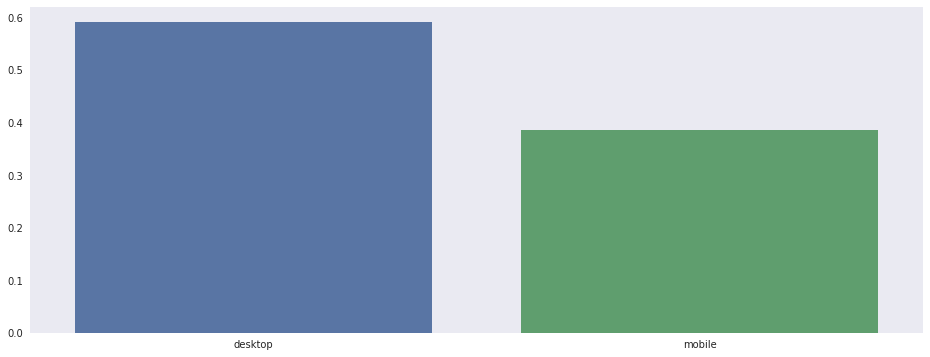

In [12]:
bar(df['DeviceType'].value_counts(dropna=False), normalize=True)

In [13]:
def classify_device(device):
  if not isinstance(device, str): return np.nan
  
  device_types = {
    r'windows': 'windows',
    r'ios': 'ios',
    r'macos': 'macos',
    r'huawei': 'huawei',
    r'samsung': 'samsung',
    r'^sm-': 'samsung',
    r'^lg': 'lg',
    r'^moto': 'moto',
    r'^rv': 'rv',
    r'^android': 'android',
    r'build': 'android',
  }
  
  for k, v in device_types.items():  
    if re.search(k, device.lower()):
      return v
    
  return 'other'

In [14]:
df['DeviceInfo'].map(classify_device).value_counts()

windows    47775
ios        19782
macos      12573
samsung    11940
other       8888
android     5410
rv          4385
moto        2935
lg          2563
huawei      2415
Name: DeviceInfo, dtype: int64

In [15]:
def classify_os(os):
  if not isinstance(os, str): return np.nan
  
  os_types = {
    r'^windows': 'windows',
    r'^mac': 'mac',
    r'^linux': 'linux',
    r'android': 'android',
    r'ios': 'ios',
  }
  
  for k, v in os_types.items():  
    if re.search(k, os.lower()):
      return v
    
  return 'other'

In [16]:
df['id_30'].map(classify_os).value_counts()

windows    36739
ios        19782
mac        13580
android     6303
linux       1136
other         25
Name: id_30, dtype: int64

In [17]:
ss = df['id_33'].str.extract(r'(\d+)x(\d+)', expand=True)
ss.columns = ['width', 'height']
ss

,width,height
0,2220,1080
1,1334,750
2,NaN,NaN
3,NaN,NaN
4,1280,800
5,1366,768
6,NaN,NaN
7,1920,1080
8,NaN,NaN
9,NaN,NaN


In [18]:
id_cols = select_columns_regexp(r'id_\d+')
id_cols

['id_01',
 'id_02',
 'id_03',
 'id_04',
 'id_05',
 'id_06',
 'id_07',
 'id_08',
 'id_09',
 'id_10',
 'id_11',
 'id_12',
 'id_13',
 'id_14',
 'id_15',
 'id_16',
 'id_17',
 'id_18',
 'id_19',
 'id_20',
 'id_21',
 'id_22',
 'id_23',
 'id_24',
 'id_25',
 'id_26',
 'id_27',
 'id_28',
 'id_29',
 'id_30',
 'id_31',
 'id_32',
 'id_33',
 'id_34',
 'id_35',
 'id_36',
 'id_37',
 'id_38']

In [19]:
df_float = df.select_dtypes('float')

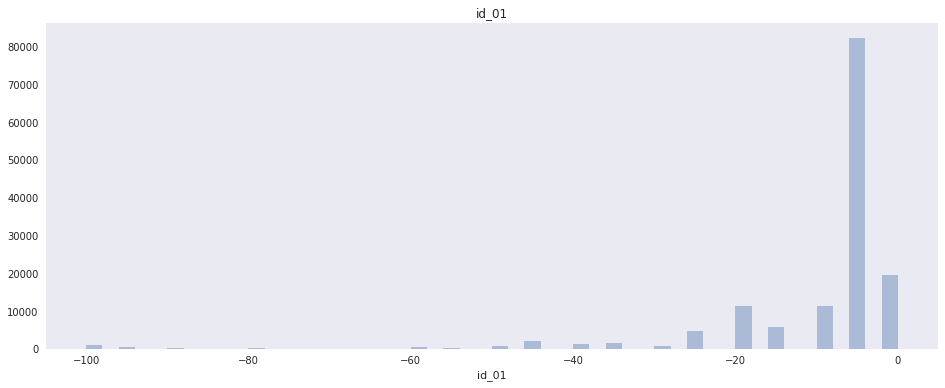

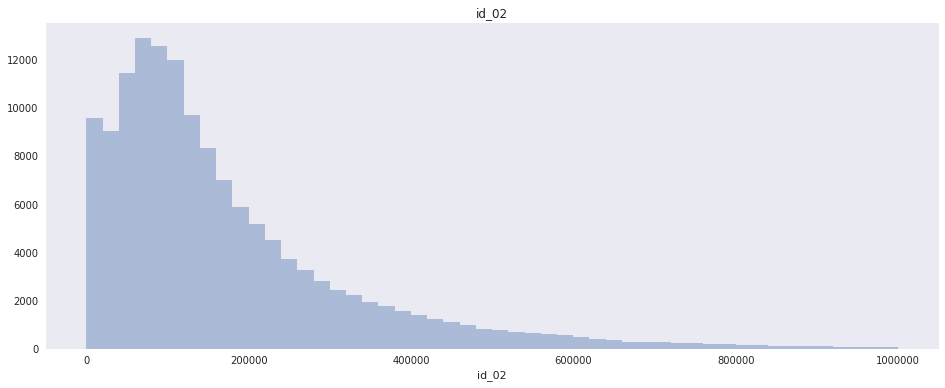

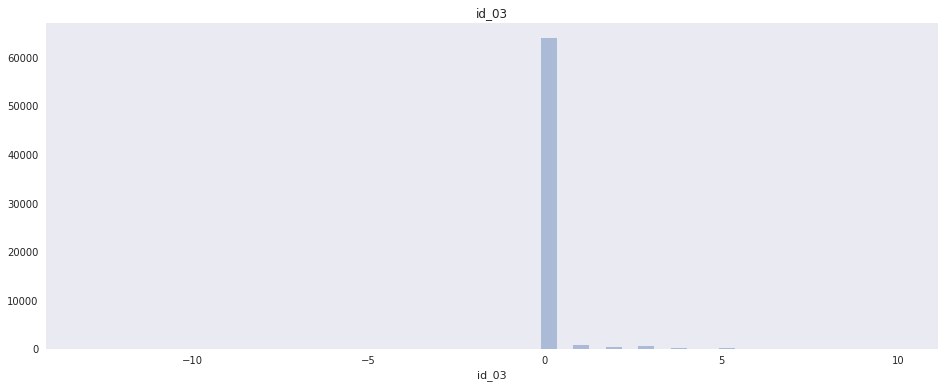

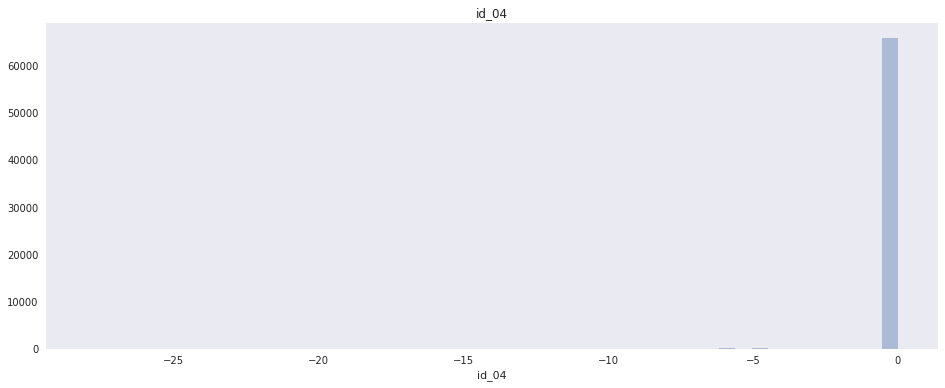

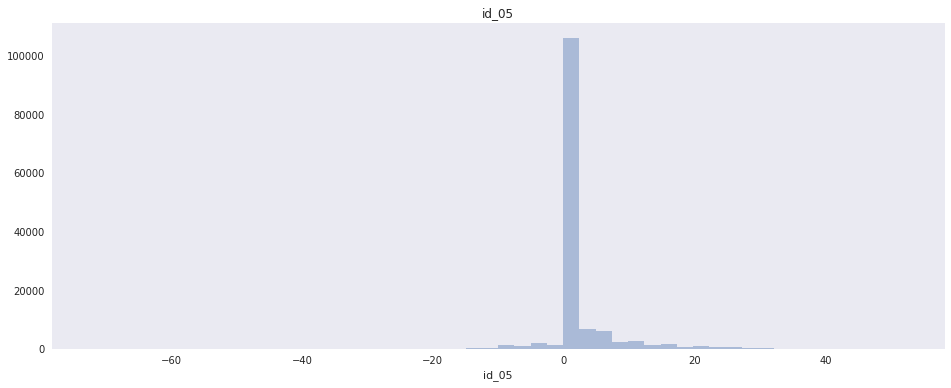

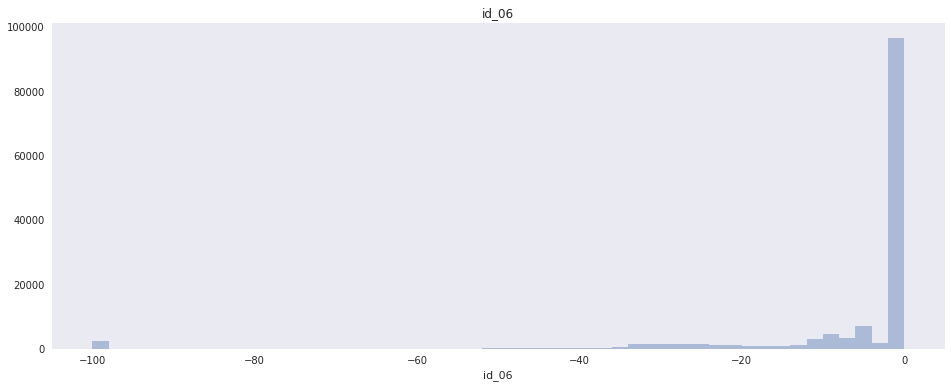

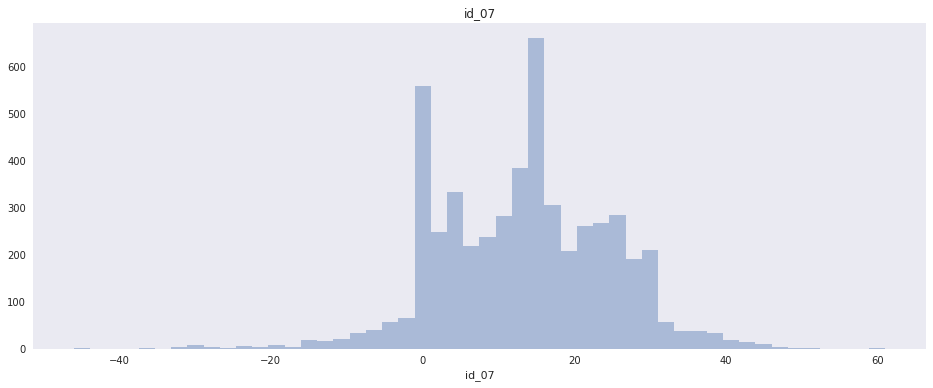

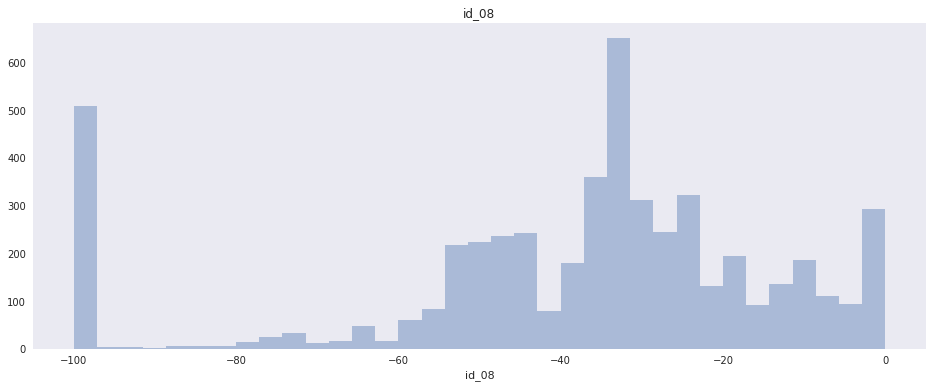

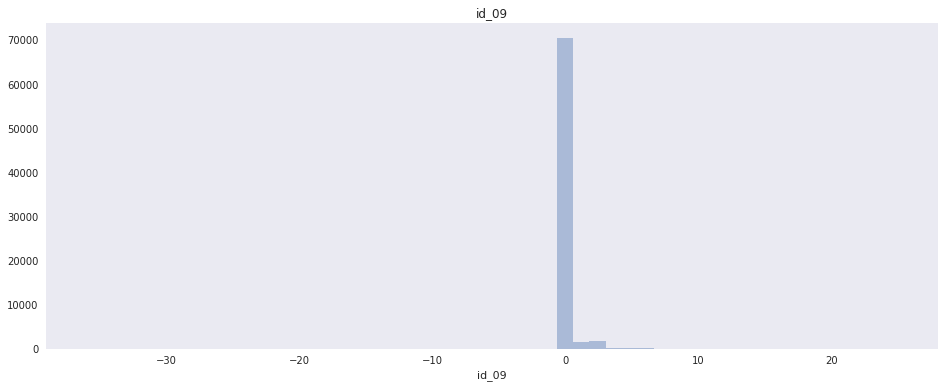

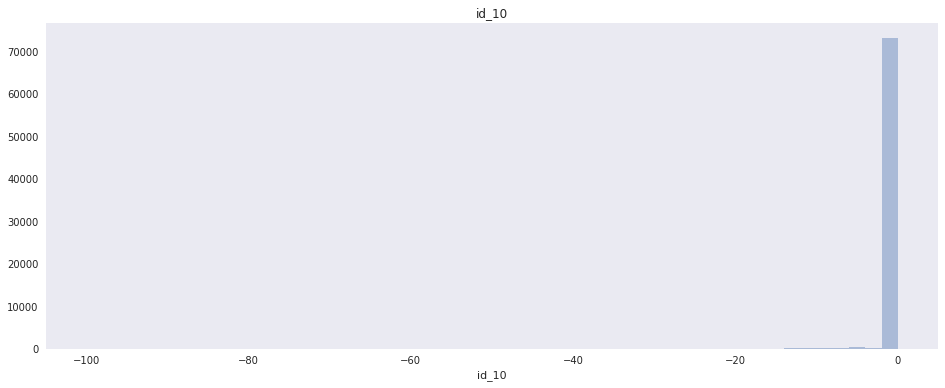

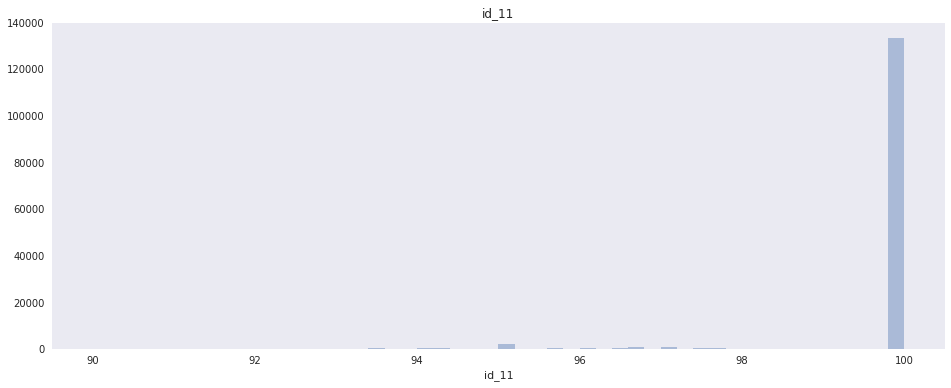

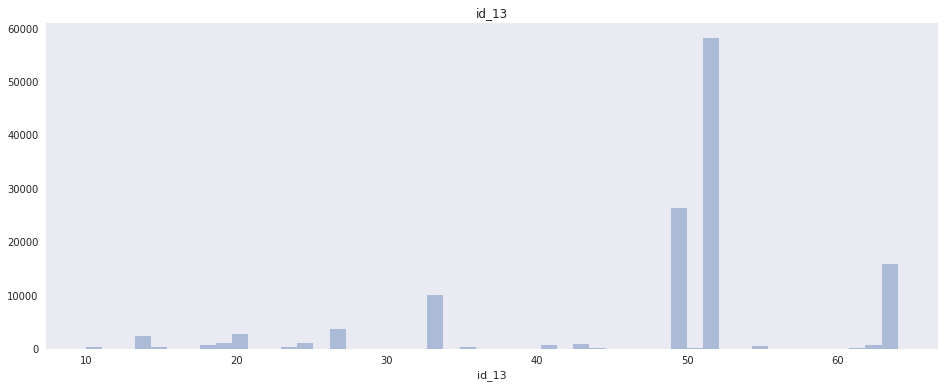

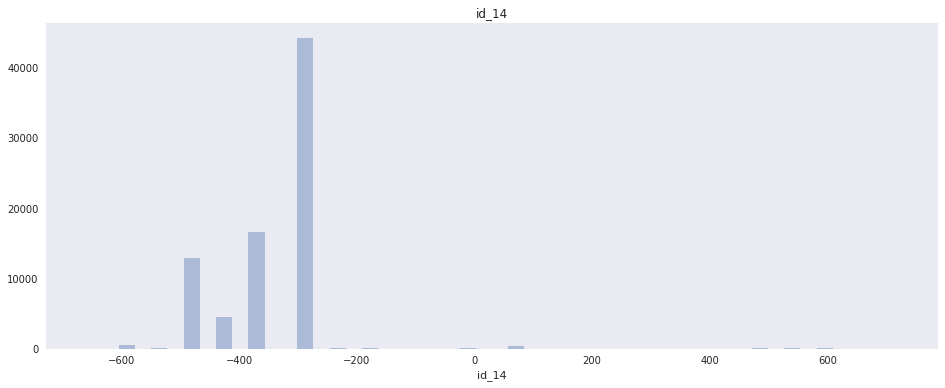

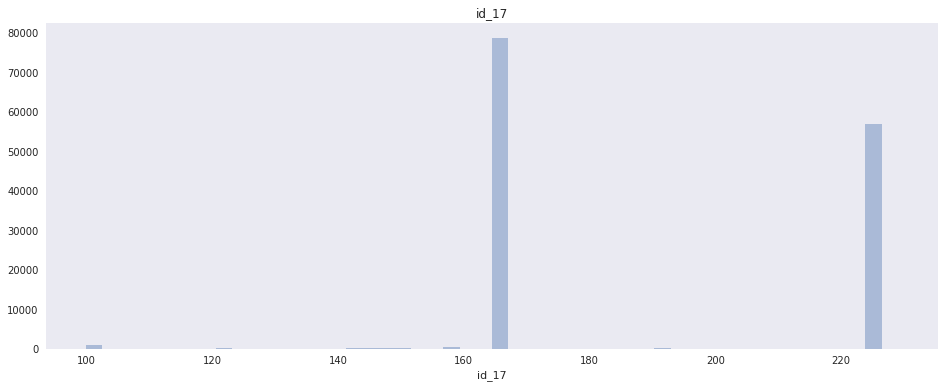

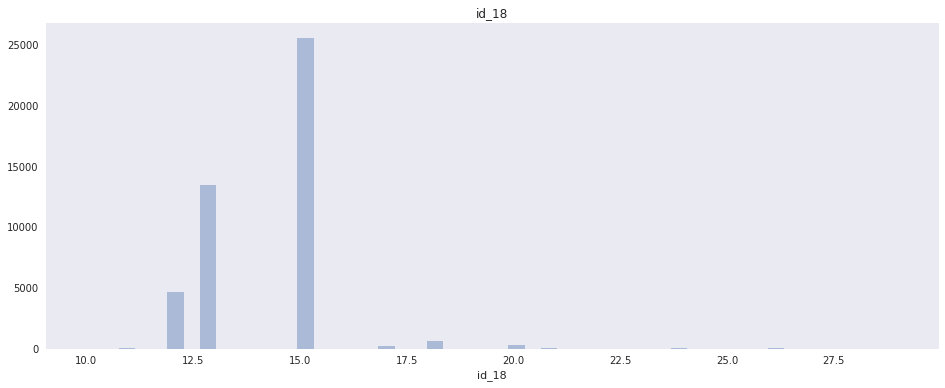

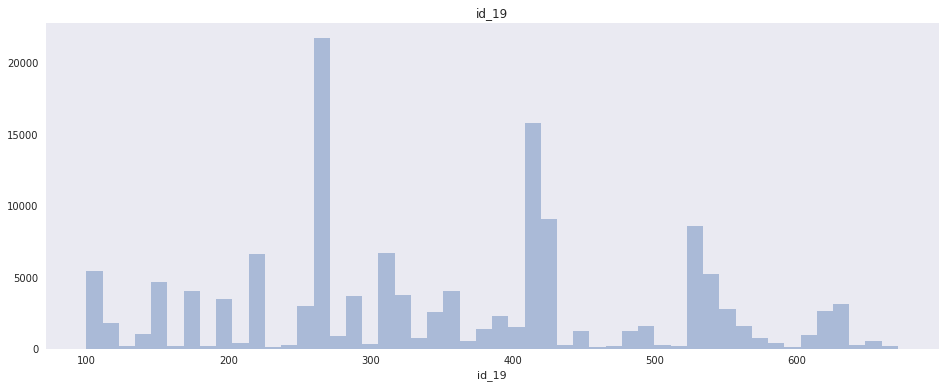

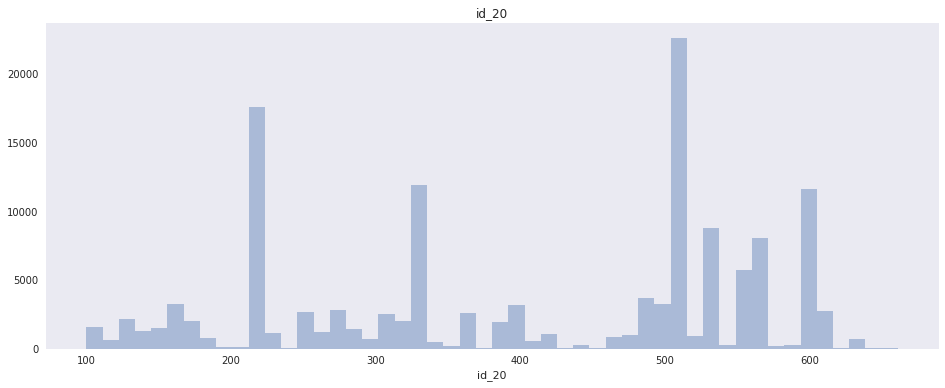

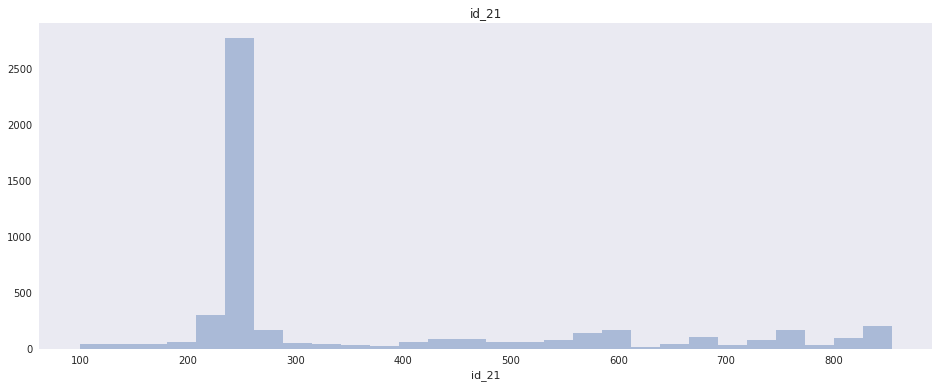

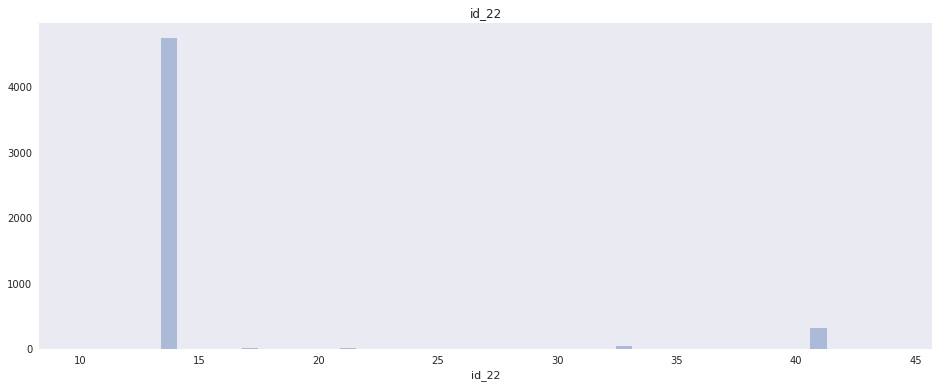

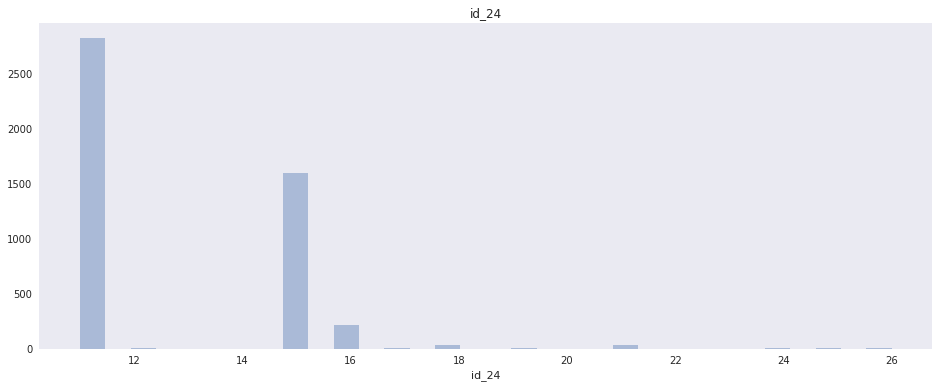

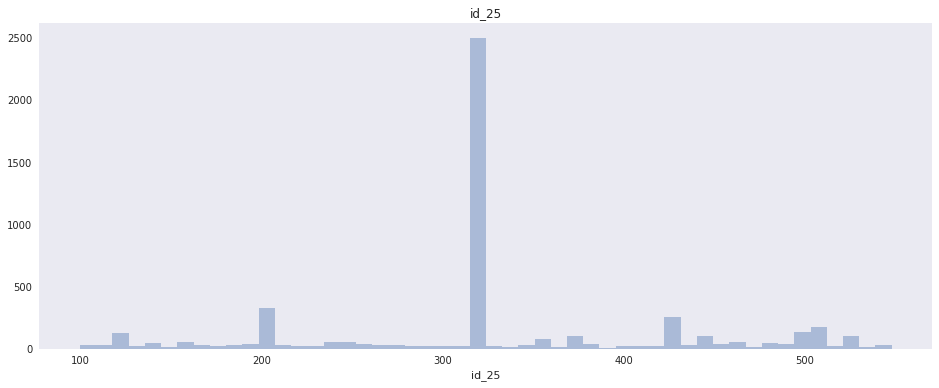

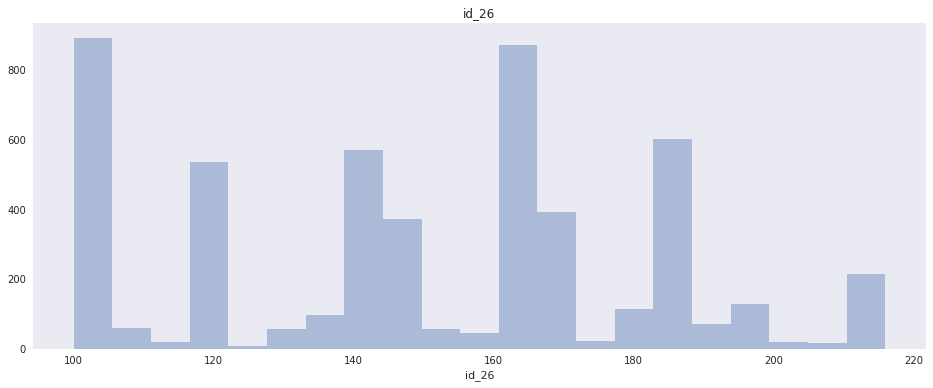

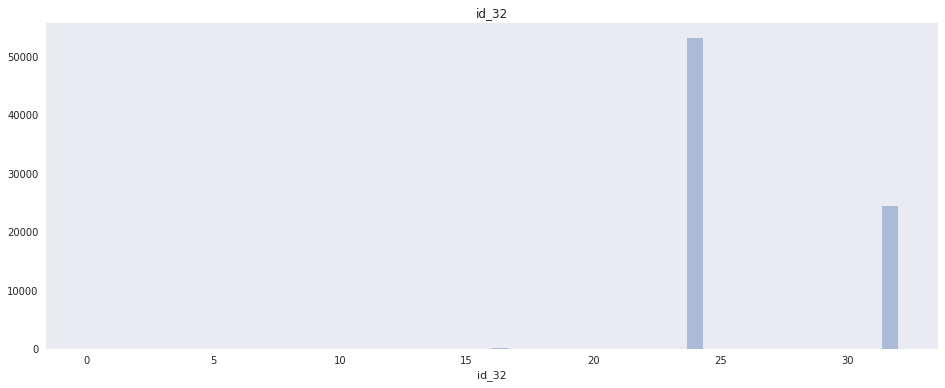

In [20]:
for col in df_float.columns:
  hist(df_float[col], title=col)

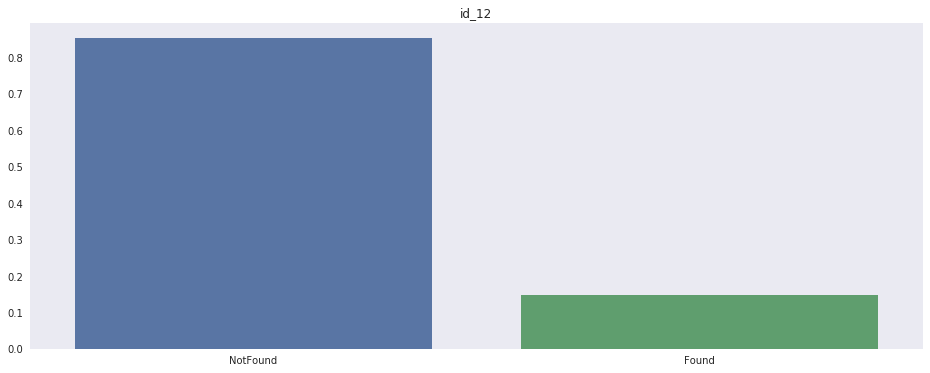

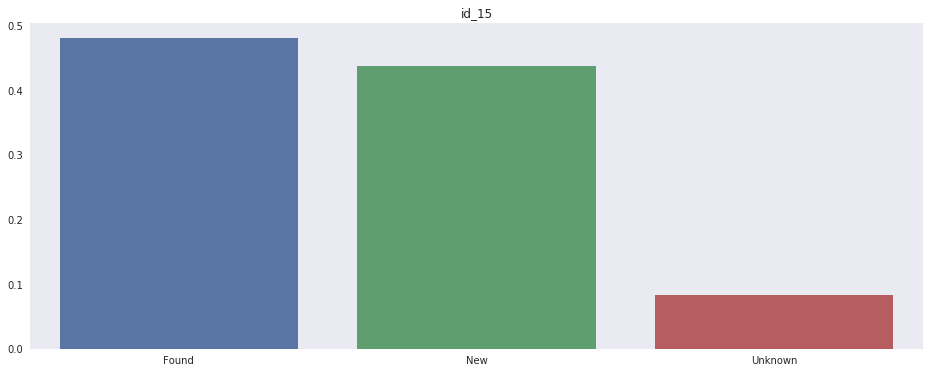

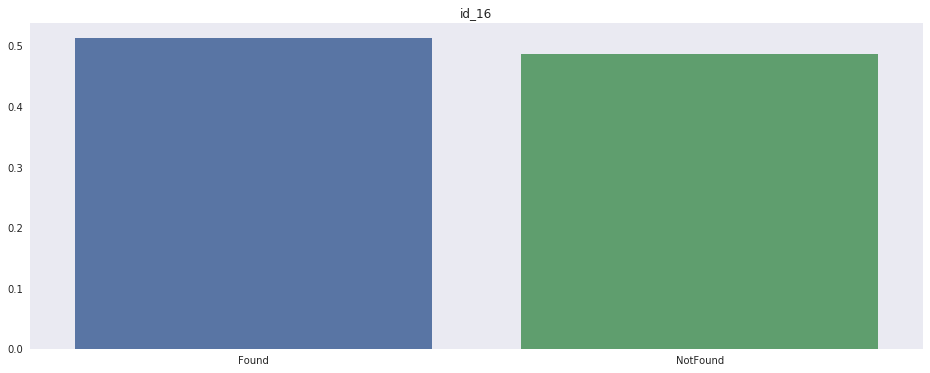

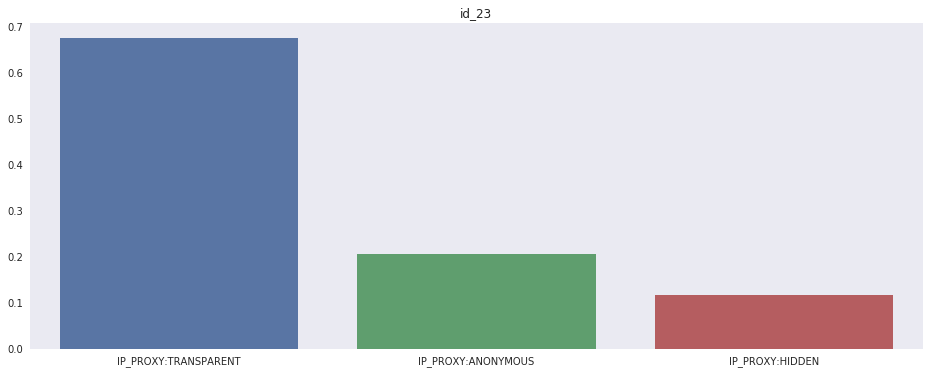

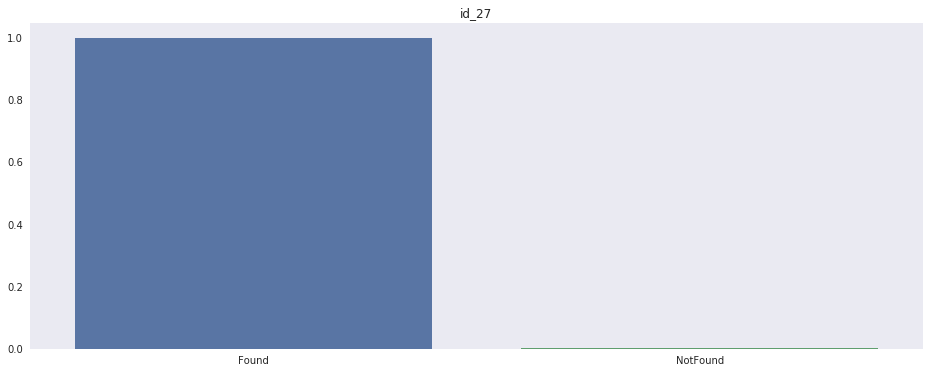

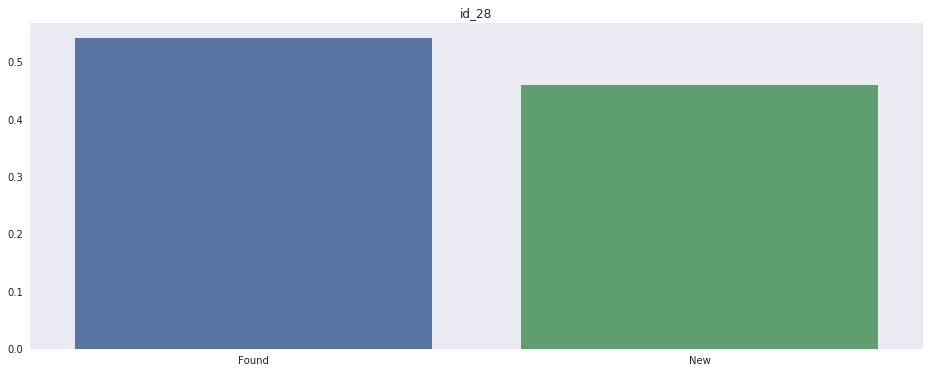

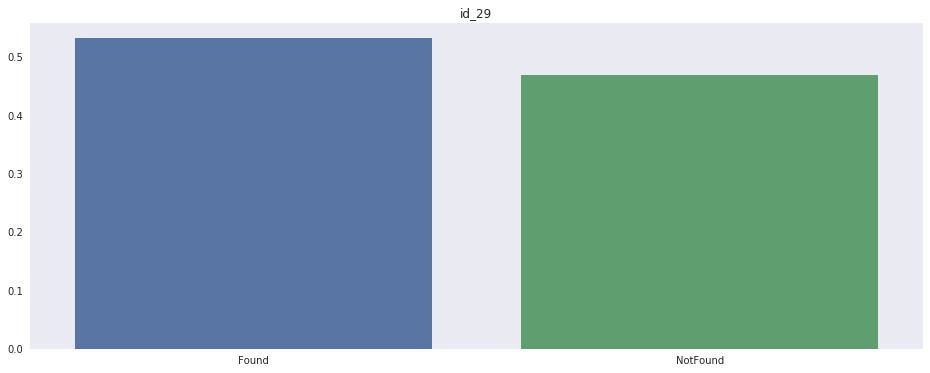

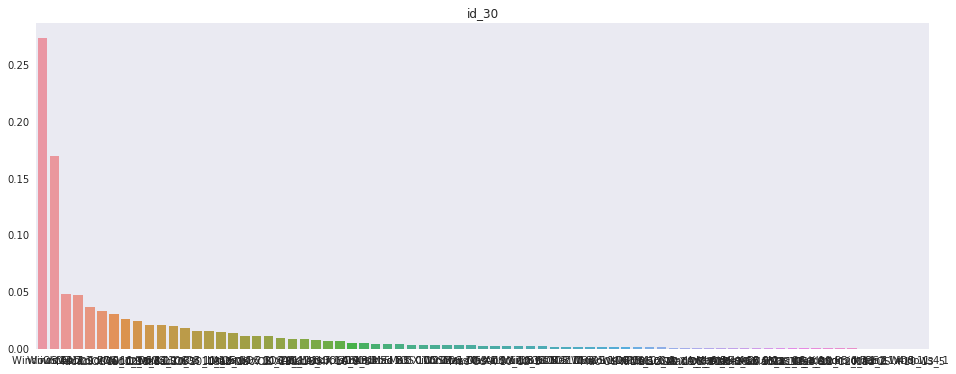

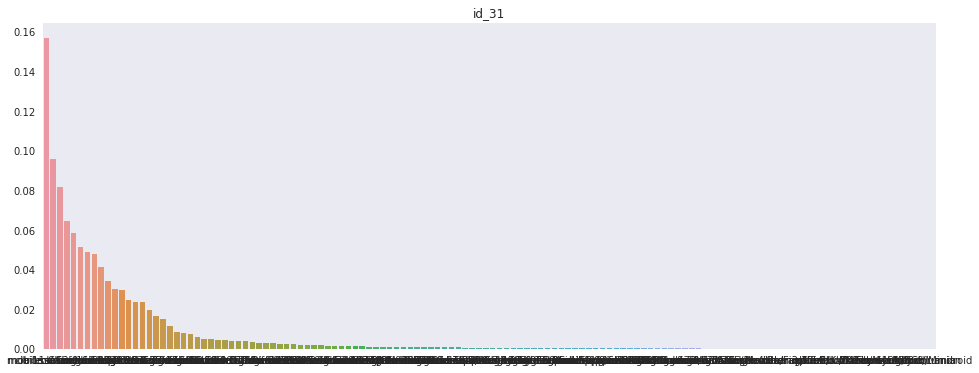

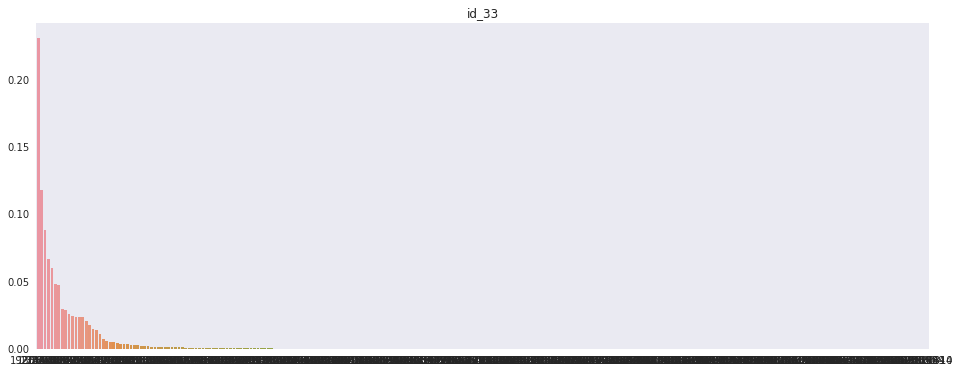

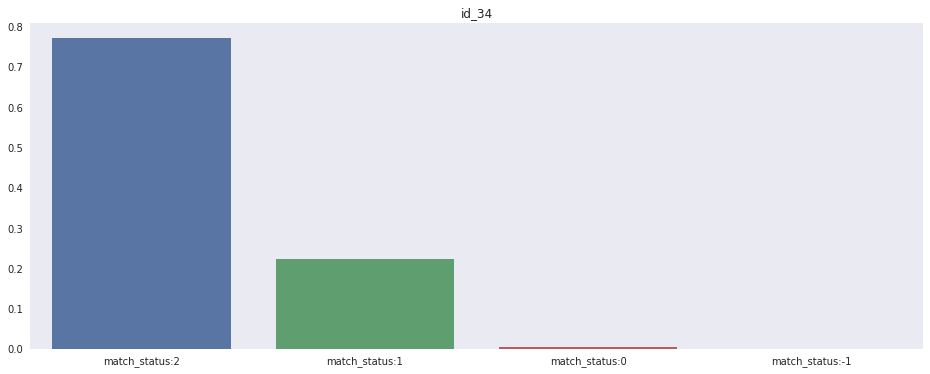

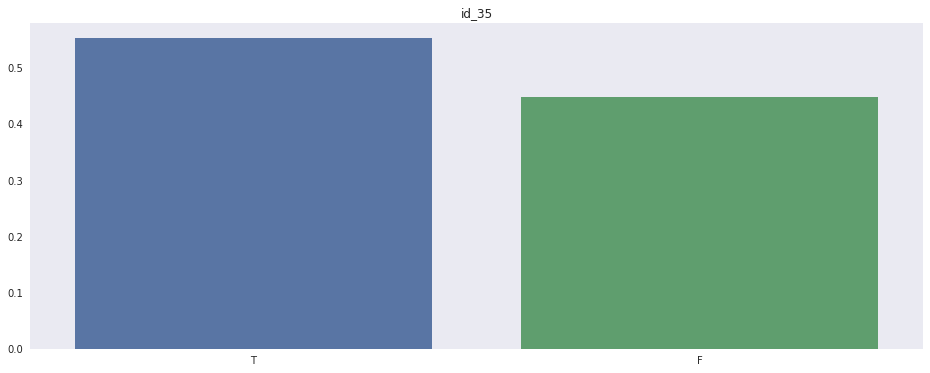

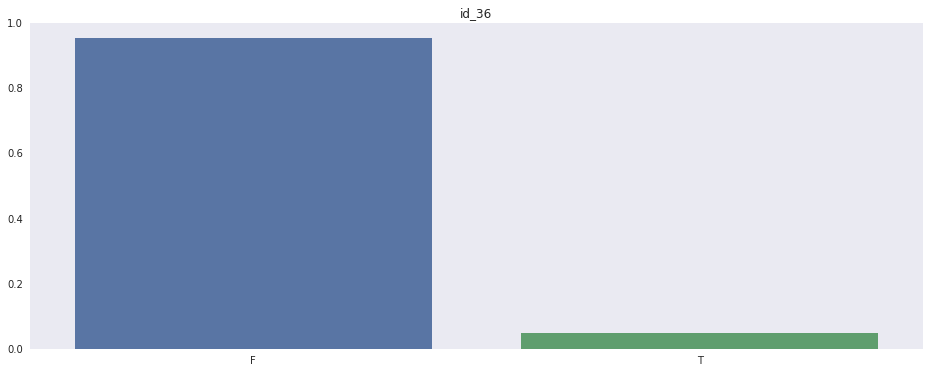

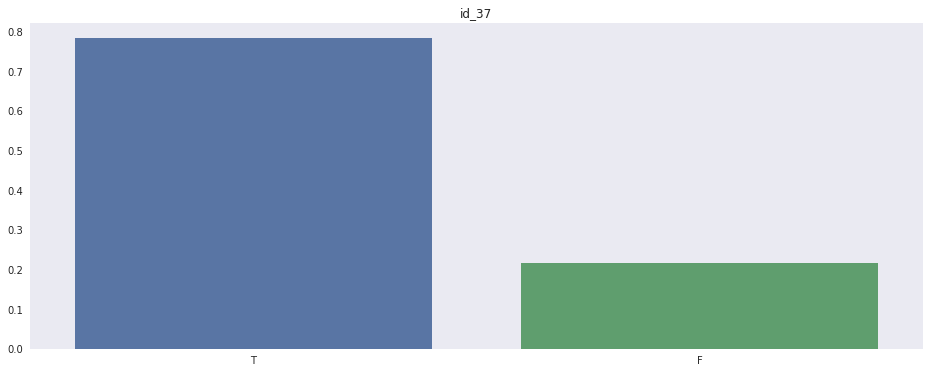

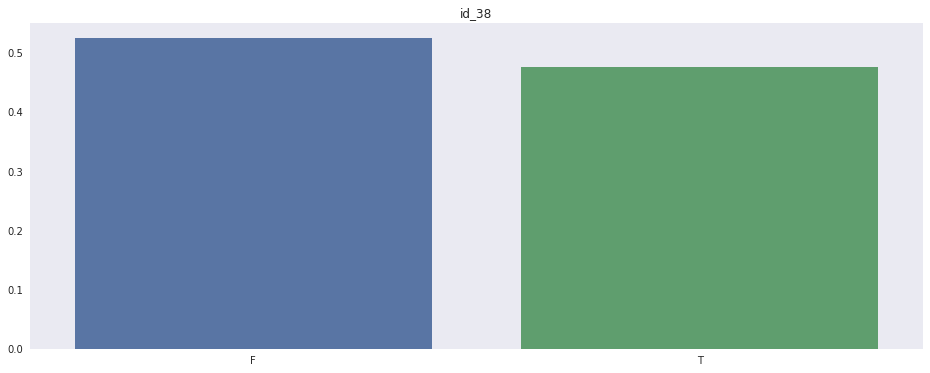

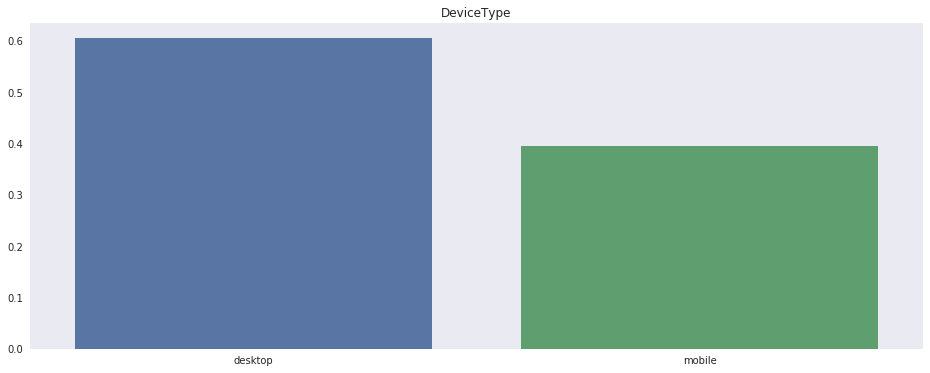

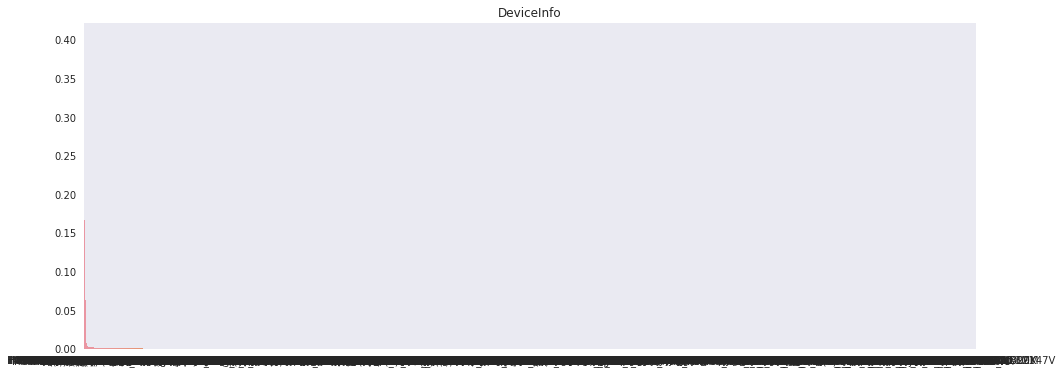

In [21]:
obj_cols = df.select_dtypes('object').columns

for col in obj_cols:
  vc = df[col].value_counts()
  bar(vc, normalize=True, title=col)